In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.pipeline import Pipeline
import spacy
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix

import pandas as pd
from sklearn.model_selection import train_test_split
from proj_helper import Helper, TimeHelper
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
chat_data = pd.read_excel('UserChatData.xlsx', header=0) 
chat_data.head(10)

,Chat,Group
0,interjection,1
1,interjection I am username,1
2,interjection I'm username,1
3,interjection Glad to meet you!,1
4,interjection Nice to meet you!,1
5,interjection My name is username,1
6,interjection usergreet,1
7,interjection usergreet I am username,1
8,interjection usergreet. I'm username,1
9,interjection usergreet. My name is username,1


In [3]:
chat_data['Group'].value_counts()

4    72
3    64
6    63
7    60
5    60
2    60
1    60
8    40
Name: Group, dtype: int64

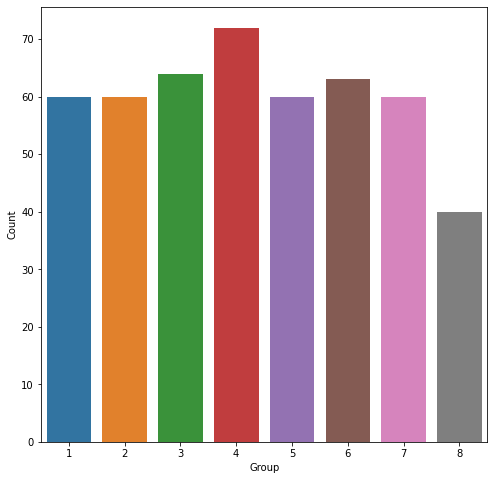

In [4]:
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
plt.ylabel('Count')
sns.countplot(x ='Group',
              data = chat_data,
              ax = ax)
ax.set(ylabel='Count')
plt.show()

In [5]:
from wordcloud import WordCloud, STOPWORDS

In [6]:
def show_wordcloud(group):
    df = chat_data[chat_data['Group'] == group]
  
    comment_words = '' 
    stopwords = set(STOPWORDS) 
  
    # iterate through the csv file 
    for val in df['Chat']: 
      
        # typecaste each val to string 
        val = str(val) 
  
        # split the value 
        tokens = val.split() 
      
        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
      
        comment_words += " ".join(tokens)+" "
  
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 
  
    # plot the WordCloud image
    plt.figure(figsize = (6, 6), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(f'Word Cloud for group {group}', size=16)
  
    plt.show()

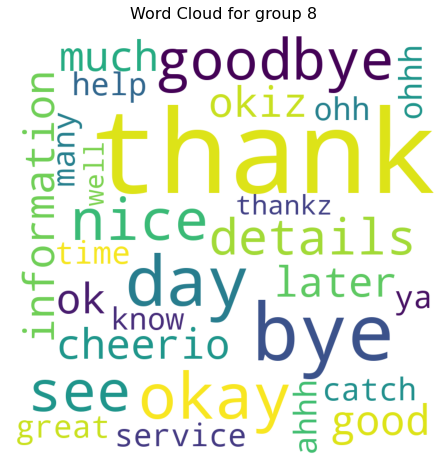

In [12]:
show_wordcloud(8)